In [1]:
import pandas as pd 
import os 
import numpy as np 
from glob import glob 

# 정량 

In [2]:
# csv_dirs = ["/Volume/VAD/LifeLongerAD_cu121/results/CFGCAD/MVTecAD/sparse14_DST-3_5_with_5_step-Continual_True-online_False/seed_42/results/main.csv",
#             "/Volume/VAD/LifeLongerAD_cu121/results/CFGCAD/MVTecAD/sparse14_no-3_5_with_5_step-Continual_True-online_False/seed_42/results/main.csv",
#             "/Volume/VAD/LifeLongerAD_cu121/results/CFGCAD/MVTecAD/Sparse15_ce_loss-DST-Continual_True-online_False/seed_42/results/main.csv",
#             "/Volume/VAD/LifeLongerAD_cu121/results/CFGCAD/MVTecAD/sparse10_any_param-3_5_with_5_step-Continual_True-online_False/seed_42/results/main.csv",
#             "/Volume/VAD/LifeLongerAD_cu121/results/CFGCAD/MVTecAD/sparse11_replay-3_5_with_5_step-Continual_True-online_False/seed_42/results/main.csv",
#             ]

csv_dirs = ["/Volume/VAD/LifeLongerAD_cu121/results/CFGCAD/MVTecAD/sparse14_DST-3_5_with_5_step-Continual_True-online_False/seed_42/results/main.csv",
            "/Volume/VAD/LifeLongerAD_cu121/results/CFGCAD/MVTecAD/sparse14_no-3_5_with_5_step-Continual_True-online_False/seed_42/results/main.csv",
            '/Volume/VAD/LifeLongerAD_cu121/results/CFGCAD/MVTecAD/Sparse15_ce_loss_no-Continual_True-online_False/seed_42/results/main.csv',
            "/Volume/VAD/LifeLongerAD_cu121/results/CFGCAD/MVTecAD/Sparse15_ce_loss_DST-Continual_True-online_False/seed_42/results/main.csv",
            '/Volume/VAD/LifeLongerAD_cu121/results/CFGCAD/MVTecAD/sparse16_sratio0.4_DST-3_5_with_5_step-Continual_True-online_False/seed_42/results/main.csv',
            '/Volume/VAD/LifeLongerAD_cu121/results/CFGCAD/MVTecAD/sparse17_ndblock8_DST-3_5_with_5_step-Continual_True-online_False/seed_42/results/main.csv',
            '/Volume/VAD/LifeLongerAD_cu121/results/CFGCAD/MVTecAD/sparse18_srati04_DST-3_5_with_5_step-Continual_True-online_False/seed_42/results/main.csv',
            '/Volume/VAD/LifeLongerAD_cu121/results/CFGCAD/MVTecAD/sparse18_srati09_DST-3_5_with_5_step-Continual_True-online_False/seed_42/results/main.csv',
            '/Volume/VAD/LifeLongerAD_cu121/results/CFGCAD/MVTecAD/sparse20_ndblock8_DST-3_5_with_5_step-Continual_True-online_False/seed_42/results/main.csv',
            '/Volume/VAD/LifeLongerAD_cu121/results/CFGCAD/MVTecAD/sparse22_DST-3_5_with_5_step-Continual_True-online_False/seed_42/results/main.csv',
            '/Volume/VAD/LifeLongerAD_cu121/results/CFGCAD/MVTecAD/sparse23_DST-3_5_with_5_step-Continual_True-online_False/seed_42/results/main.csv'
            ]



def get_experiment_results(csv_dirs):
    df = pd.DataFrame()
    for cv in csv_dirs:
        temp = pd.read_csv(cv)
        temp['exp_name'] = cv.split('/')[-4].split('-')[0]
        df = pd.concat([df,temp[temp['class_name']=='AA']])
        
    metrics = ['img_level_auroc', 'pix_level_auroc', 'img_level_average_precision', 'pix_level_average_precision']
    df = df.drop(columns=['Unnamed: 0','class_name'])[['exp_name'] + metrics]
    df['average'] = df[metrics].mean(axis=1)
    return df.set_index(df['exp_name']).drop(columns='exp_name')

df = get_experiment_results(csv_dirs)
df.round(3)

,img_level_auroc,pix_level_auroc,img_level_average_precision,pix_level_average_precision,average
exp_name,,,,,
sparse14_DST,0.618,0.831,0.787,0.175,0.603
sparse14_no,0.616,0.813,0.779,0.179,0.596
Sparse15_ce_loss_no,0.618,0.808,0.790,0.175,0.598
Sparse15_ce_loss_DST,0.612,0.828,0.787,0.170,0.599
sparse16_sratio0.4_DST,0.612,0.826,0.787,0.162,0.597
sparse17_ndblock8_DST,0.625,0.834,0.791,0.176,0.607
sparse18_srati04_DST,0.608,0.822,0.789,0.165,0.596
sparse18_srati09_DST,0.627,0.826,0.797,0.173,0.606
sparse20_ndblock8_DST,0.628,0.823,0.793,0.147,0.598


# Baseline vs BAseline+DST 비교 

In [4]:
def get_experiment_results(csv_dirs):
    df = pd.DataFrame()
    for cv in csv_dirs:
        cv = os.path.join(cv, 'main.csv')
        temp = pd.read_csv(cv)
        temp['exp_name'] = cv.split('/')[-4].split('-')[0]
        df = pd.concat([df,temp[temp['class_name']=='AA']])
        
    metrics = ['img_level_auroc', 'pix_level_auroc', 'img_level_average_precision', 'pix_level_average_precision']
    df = df.drop(columns=['Unnamed: 0','class_name'])[['exp_name'] + metrics]
    df['average'] = df[metrics].mean(axis=1)
    return df.set_index(df['exp_name']).drop(columns='exp_name')

csv_dirs = ["/Volume/VAD/LifeLongerAD_cu121/results/CFGCAD/MVTecAD/sparse14_no-3_5_with_5_step-Continual_True-online_False/seed_42/results",
    '/Volume/VAD/LifeLongerAD_cu121/results/CFGCAD/MVTecAD/sparse23_DST-3_5_with_5_step-Continual_True-online_False/seed_42/results'
            ]
df = get_experiment_results(csv_dirs)
df.round(3)

,img_level_auroc,pix_level_auroc,img_level_average_precision,pix_level_average_precision,average
exp_name,,,,,
sparse14_no,0.616,0.813,0.779,0.179,0.596
sparse23_DST,0.644,0.833,0.806,0.154,0.609


In [5]:
def get_class_results_and_task_order(cv):
    cv = os.path.join(cv, 'result_log.csv')
    df = pd.read_csv(cv)

    task_names = df['GT_class_name'].unique()

    class_results = pd.DataFrame()
    for i, tn in enumerate(task_names):
        if i == 0:
            temp_df = df[(df['class_name'] == tn) & (df['last'] == 1)].iloc[0:]
        else:
            temp_df = df[(df['class_name'] == tn) & (df['last'] == 1)].iloc[1:]
        temp_df = temp_df[['class_name', 'GT_class_name', 'img_level_auroc', 'pix_level_auroc', 'img_level_average_precision', 'pix_level_average_precision']]
        metrics = ['img_level_auroc', 'pix_level_auroc', 'img_level_average_precision', 'pix_level_average_precision']
        temp_df['average'] = temp_df[metrics].mean(axis=1)
        class_results = pd.concat([class_results, temp_df])
    
    class_results.round(3).reset_index(drop=True, inplace=True)
    task_order = {tn: i for i, tn in enumerate(task_names)}

    return class_results, task_order

def get_class_results_dict(csv_dirs):
    class_results_dict = {}
    for cv in csv_dirs:
        class_results, task_order = get_class_results_and_task_order(cv)
        class_results_dict[cv.split('/')[-3].split('-')[0]] = class_results
    return class_results_dict, task_order

class_results_dict, task_order = get_class_results_dict(csv_dirs)
df = class_results_dict[list(class_results_dict.keys())[0]]
df[df['class_name'] == df['GT_class_name']]

,class_name,GT_class_name,img_level_auroc,pix_level_auroc,img_level_average_precision,pix_level_average_precision,average
41,"['grid', 'carpet', 'cable']","['grid', 'carpet', 'cable']",0.944082,0.971001,0.971993,0.487823,0.843725
85,"['zipper', 'wood', 'tile']","['zipper', 'wood', 'tile']",0.941925,0.940951,0.982070,0.435262,0.825052
130,"['metal_nut', 'transistor', 'bottle']","['metal_nut', 'transistor', 'bottle']",0.960934,0.964967,0.977192,0.649596,0.888173
176,"['leather', 'pill', 'hazelnut']","['leather', 'pill', 'hazelnut']",0.954637,0.951932,0.985909,0.313462,0.801485
223,"['toothbrush', 'capsule', 'screw']","['toothbrush', 'capsule', 'screw']",0.852050,0.979545,0.945914,0.427398,0.801227


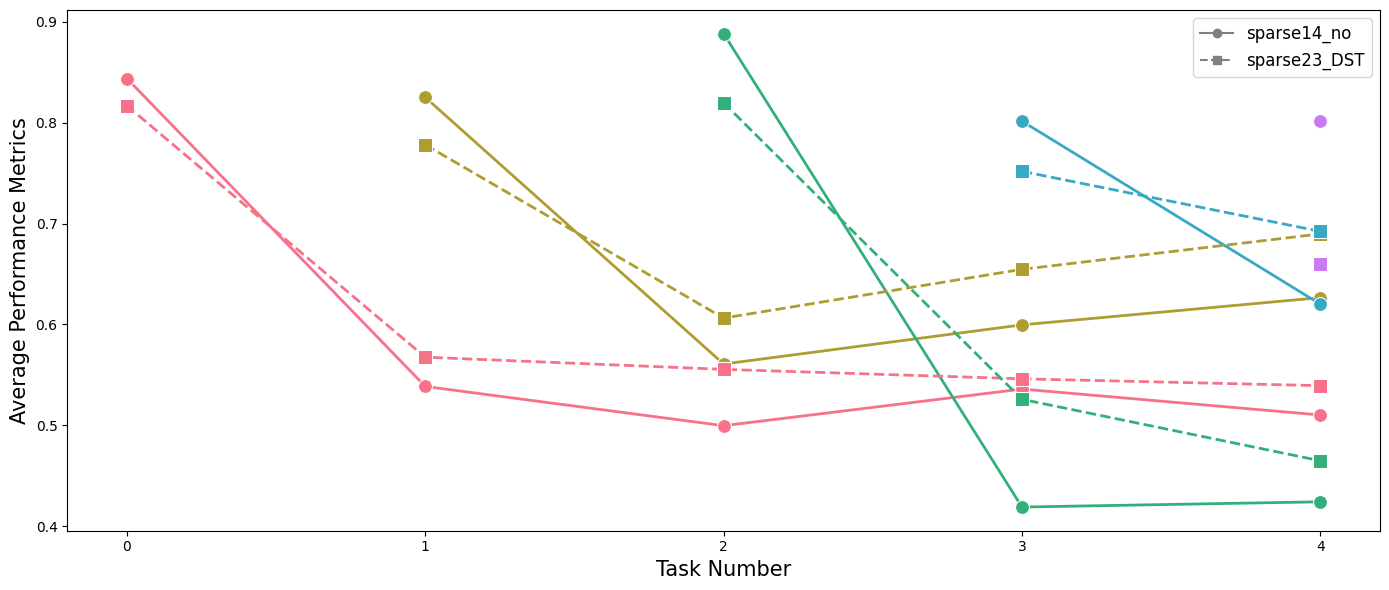

In [6]:
import seaborn as sns
import itertools
import matplotlib.pyplot as plt

def visualize_class_results(class_results_dict, task_order):
    fig, axes = plt.subplots(1, 1, figsize=(14, 6))

    # Automatically generate linestyles and markers based on class_results_dict keys
    linestyle_cycle = itertools.cycle(['-', '--', '-.', ':'])
    marker_cycle = itertools.cycle(['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'x'])
    linestyles = {key: next(linestyle_cycle) for key in class_results_dict.keys()}
    markers = {key: next(marker_cycle) for key in class_results_dict.keys()}

    colors = sns.color_palette("husl", n_colors=len(class_results_dict[list(class_results_dict.keys())[0]]['class_name'].unique()))

    for key, class_results in class_results_dict.items():
        class_results['task_number'] = class_results['GT_class_name'].map(task_order)

        for i, class_name in enumerate(class_results['class_name'].unique()):
            sns.lineplot(data=class_results[class_results['class_name'] == class_name], 
                         x='task_number', 
                         y='average',
                         color=colors[i],
                         marker=markers[key],
                         markersize=10,
                         linestyle=linestyles[key],
                         linewidth=2,
                         ax=axes)

    # Create a custom legend for keys
    legend_elements = [plt.Line2D([0], [0], color='gray', linestyle=linestyles[key], marker=markers[key], label=key)
                       for key in class_results_dict.keys()]
    axes.legend(handles=legend_elements,  fontsize=12, title_fontsize=14)

    
    axes.set_xlabel('Task Number',fontsize=15)
    axes.set_ylabel('Average Performance Metrics',fontsize=15)
    axes.set_xticks([0, 1, 2, 3, 4])
    
    plt.tight_layout()
    plt.show()

visualize_class_results(class_results_dict, task_order)    

# Baseline vs DST vs CE Loss 

In [20]:
csv_dirs = ["/Volume/VAD/LifeLongerAD_cu121/results/CFGCAD/MVTecAD/sparse14_no-3_5_with_5_step-Continual_True-online_False/seed_42/results",
            "/Volume/VAD/LifeLongerAD_cu121/results/CFGCAD/MVTecAD/sparse14_DST-3_5_with_5_step-Continual_True-online_False/seed_42/results",            
            "/Volume/VAD/LifeLongerAD_cu121/results/CFGCAD/MVTecAD/Sparse15_ce_loss_no-Continual_True-online_False/seed_42/results",
            "/Volume/VAD/LifeLongerAD_cu121/results/CFGCAD/MVTecAD/Sparse15_ce_loss_DST-Continual_True-online_False/seed_42/results"                        
            ]
df = get_experiment_results(csv_dirs)
df.round(3)

,img_level_auroc,pix_level_auroc,img_level_average_precision,pix_level_average_precision
exp_name,,,,
sparse14_no,0.616,0.813,0.779,0.179
sparse14_DST,0.618,0.831,0.787,0.175
Sparse15_ce_loss_no,0.618,0.808,0.790,0.175
Sparse15_ce_loss_DST,0.612,0.828,0.787,0.170


In [21]:
class_results_dict,task_order = get_class_results_dict(csv_dirs)
df = class_results_dict[list(class_results_dict.keys())[0]]
df[df['class_name'] == df['GT_class_name']]

,class_name,GT_class_name,img_level_auroc,pix_level_auroc,img_level_average_precision,pix_level_average_precision,average
41,"['grid', 'carpet', 'cable']","['grid', 'carpet', 'cable']",0.944082,0.971001,0.971993,0.487823,0.843725
85,"['zipper', 'wood', 'tile']","['zipper', 'wood', 'tile']",0.941925,0.940951,0.982070,0.435262,0.825052
130,"['metal_nut', 'transistor', 'bottle']","['metal_nut', 'transistor', 'bottle']",0.960934,0.964967,0.977192,0.649596,0.888173
176,"['leather', 'pill', 'hazelnut']","['leather', 'pill', 'hazelnut']",0.954637,0.951932,0.985909,0.313462,0.801485
223,"['toothbrush', 'capsule', 'screw']","['toothbrush', 'capsule', 'screw']",0.852050,0.979545,0.945914,0.427398,0.801227


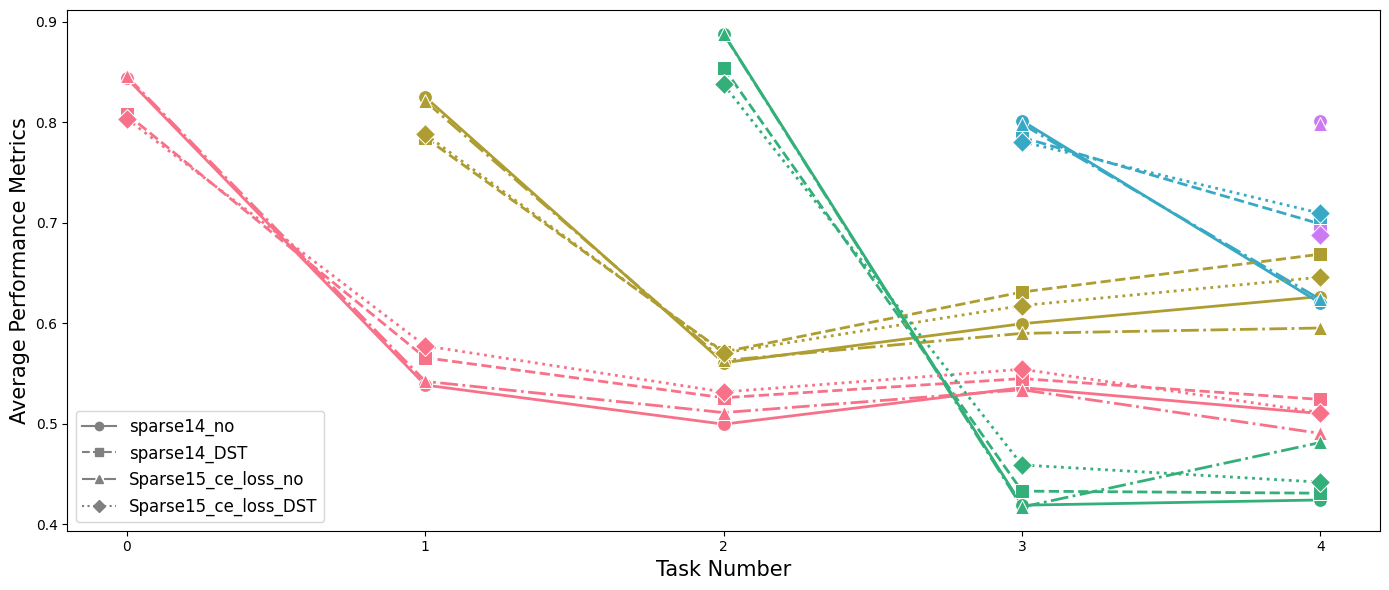

In [22]:
# Example usage:
visualize_class_results(class_results_dict, task_order)

# 하이퍼파라미터 조정 

## Sparse ratio 

In [23]:
csv_dirs = ["/Volume/VAD/LifeLongerAD_cu121/results/CFGCAD/MVTecAD/sparse14_no-3_5_with_5_step-Continual_True-online_False/seed_42/results",
            "/Volume/VAD/LifeLongerAD_cu121/results/CFGCAD/MVTecAD/sparse14_DST-3_5_with_5_step-Continual_True-online_False/seed_42/results",            
            "/Volume/VAD/LifeLongerAD_cu121/results/CFGCAD/MVTecAD/sparse16_sratio0.4_DST-3_5_with_5_step-Continual_True-online_False/seed_42/results"
            
            ]
df = get_experiment_results(csv_dirs)
df.round(3)

,img_level_auroc,pix_level_auroc,img_level_average_precision,pix_level_average_precision
exp_name,,,,
sparse14_no,0.616,0.813,0.779,0.179
sparse14_DST,0.618,0.831,0.787,0.175
sparse16_sratio0.4_DST,0.612,0.826,0.787,0.162


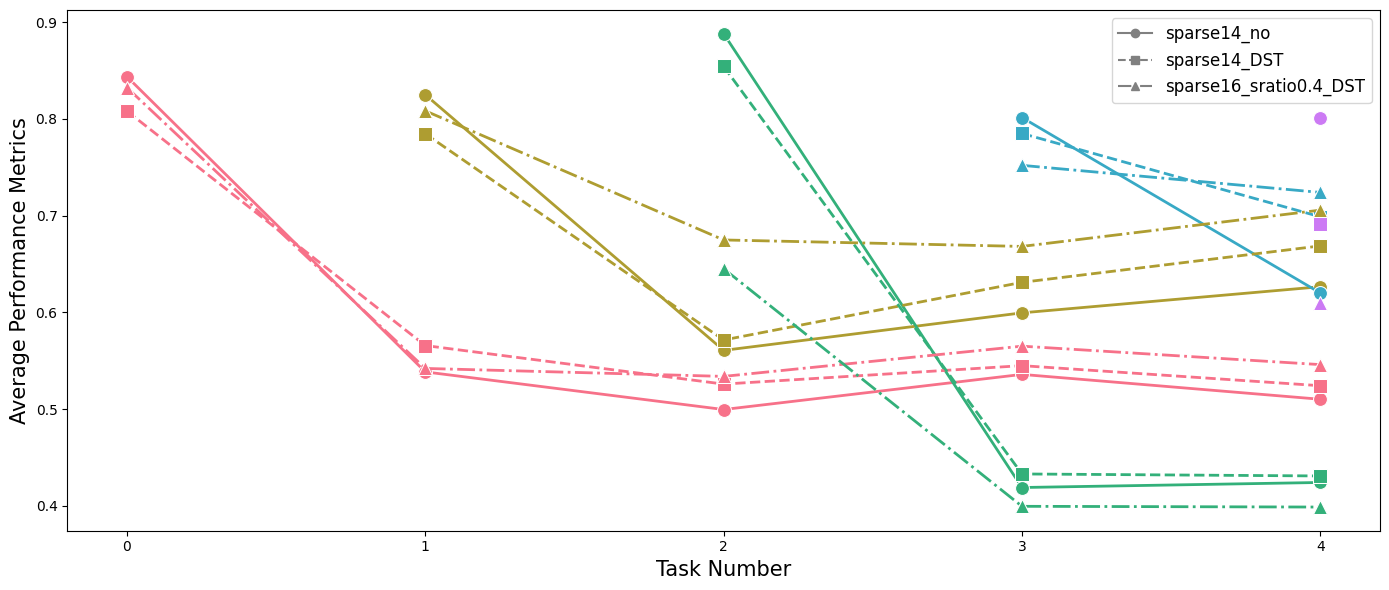

In [24]:
class_results_dict,task_order = get_class_results_dict(csv_dirs)
# Example usage:
visualize_class_results(class_results_dict, task_order)


## Capacity

In [25]:
csv_dirs = ["/Volume/VAD/LifeLongerAD_cu121/results/CFGCAD/MVTecAD/sparse14_no-3_5_with_5_step-Continual_True-online_False/seed_42/results",
            "/Volume/VAD/LifeLongerAD_cu121/results/CFGCAD/MVTecAD/sparse14_DST-3_5_with_5_step-Continual_True-online_False/seed_42/results",            
            "/Volume/VAD/LifeLongerAD_cu121/results/CFGCAD/MVTecAD/sparse17_ndblock8_DST-3_5_with_5_step-Continual_True-online_False/seed_42/results"            
            ]
df = get_experiment_results(csv_dirs)
df.round(3)

,img_level_auroc,pix_level_auroc,img_level_average_precision,pix_level_average_precision
exp_name,,,,
sparse14_no,0.616,0.813,0.779,0.179
sparse14_DST,0.618,0.831,0.787,0.175
sparse17_ndblock8_DST,0.625,0.834,0.791,0.176


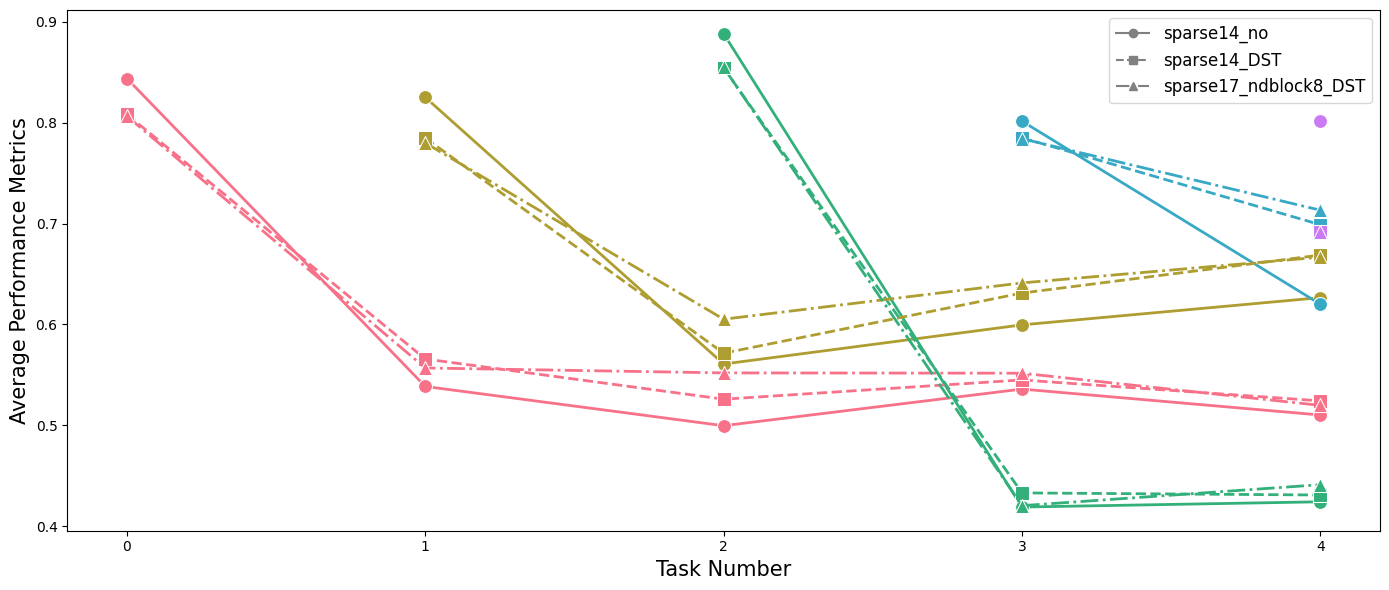

In [26]:
class_results_dict,task_order = get_class_results_dict(csv_dirs)
# Example usage:
visualize_class_results(class_results_dict, task_order)


## Sparsity + Capacity

In [30]:
csv_dirs = ["/Volume/VAD/LifeLongerAD_cu121/results/CFGCAD/MVTecAD/sparse14_DST-3_5_with_5_step-Continual_True-online_False/seed_42/results",            
            "/Volume/VAD/LifeLongerAD_cu121/results/CFGCAD/MVTecAD/sparse17_ndblock8_DST-3_5_with_5_step-Continual_True-online_False/seed_42/results",
            "/Volume/VAD/LifeLongerAD_cu121/results/CFGCAD/MVTecAD/sparse18_srati04_DST-3_5_with_5_step-Continual_True-online_False/seed_42/results",
            "/Volume/VAD/LifeLongerAD_cu121/results/CFGCAD/MVTecAD/sparse18_srati09_DST-3_5_with_5_step-Continual_True-online_False/seed_42/results"

            ]
df = get_experiment_results(csv_dirs)
df.round(3)


,img_level_auroc,pix_level_auroc,img_level_average_precision,pix_level_average_precision
exp_name,,,,
sparse14_DST,0.618,0.831,0.787,0.175
sparse17_ndblock8_DST,0.625,0.834,0.791,0.176
sparse18_srati04_DST,0.608,0.822,0.789,0.165
sparse18_srati09_DST,0.627,0.826,0.797,0.173


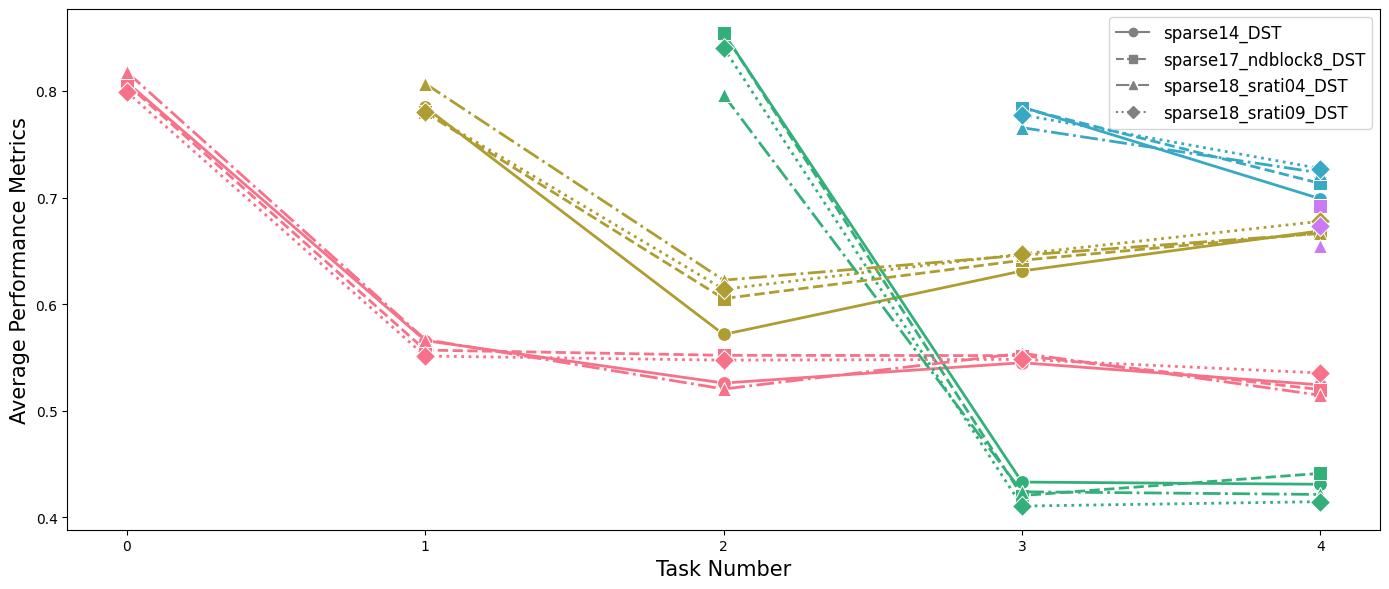

In [29]:
class_results_dict,task_order = get_class_results_dict(csv_dirs)
# Example usage:
visualize_class_results(class_results_dict, task_order)

# Optimizer 

In [11]:
csv_dirs = [
            "/Volume/VAD/LifeLongerAD_cu121/results/CFGCAD/MVTecAD/sparse17_ndblock8_DST-3_5_with_5_step-Continual_True-online_False/seed_42/results",
            "/Volume/VAD/LifeLongerAD_cu121/results/CFGCAD/MVTecAD/sparse20_ndblock8_DST-3_5_with_5_step-Continual_True-online_False/seed_42/results"            

            ]
df = get_experiment_results(csv_dirs)
df.round(3)


,img_level_auroc,pix_level_auroc,img_level_average_precision,pix_level_average_precision,average
exp_name,,,,,
sparse17_ndblock8_DST,0.625,0.834,0.791,0.176,0.607
sparse20_ndblock8_DST,0.628,0.823,0.793,0.147,0.598


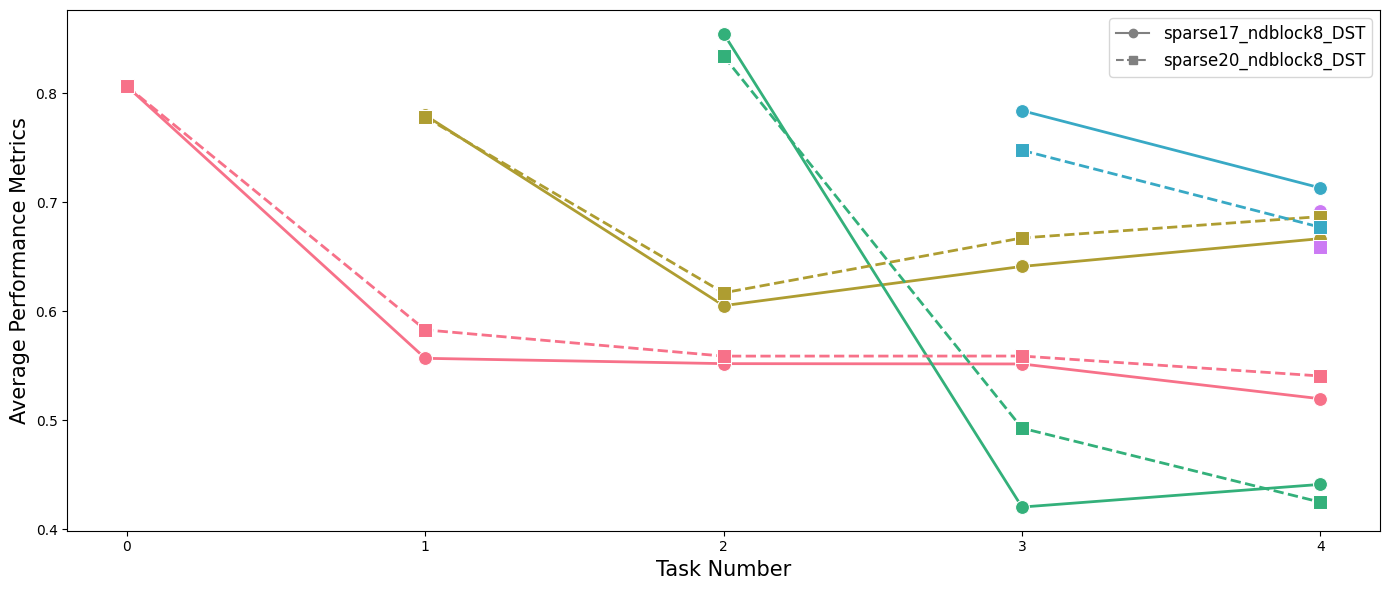

In [12]:
class_results_dict,task_order = get_class_results_dict(csv_dirs)
# Example usage:
visualize_class_results(class_results_dict, task_order)